In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob 
from tqdm import tqdm

In [2]:
# Load the dataset with the "Extracted_Aspects" column and 'Tokenized_Review' column for tokenized reviews
dataset = pd.read_csv('updated_dataset_no_missing.csv')

In [3]:
# Function to calculate sentiment scores for a review
def calculate_sentiment(review):
    analysis = TextBlob(review)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

In [4]:
# Function to calculate sentiment scores for a review based on the "Extracted_Aspects"
def calculate_sentiment(review, aspects):
    sentiment_scores = {'positive': [], 'neutral': [], 'negative': []}
    for aspect in aspects:
        analysis = TextBlob(aspect)
        polarity_score = analysis.sentiment.polarity

        if polarity_score >= 0.1:
            sentiment_scores['positive'].append(polarity_score)
        elif -0.1 < polarity_score < 0.1:
            sentiment_scores['neutral'].append(polarity_score)
        else:
            sentiment_scores['negative'].append(polarity_score)

    return sentiment_scores

In [5]:
# Function to calculate sentiment scores for tokenized reviews in list form
def calculate_sentiment_tokenized(review_tokens):
    analysis = TextBlob(' '.join(review_tokens))
    polarity_score = analysis.sentiment.polarity

    if polarity_score >= 0.1:
        return {'positive': [polarity_score], 'neutral': [], 'negative': []}
    elif -0.1 < polarity_score < 0.1:
        return {'positive': [], 'neutral': [polarity_score], 'negative': []}
    else:
        return {'positive': [], 'neutral': [], 'negative': [polarity_score]}


In [6]:
# Function to determine the label based on sentiment scores
def determine_label(sentiment_scores):
    if sentiment_scores['positive']:
        return 'positive'
    elif sentiment_scores['negative']:
        return 'negative'
    else:
        return 'neutral'

In [7]:
# Function to compare the generated label with the existing label
def compare_labels(row):
    generated_label = row['Label']
    existing_label = row['Label (Based on Rating)']
    return generated_label == existing_label

In [8]:
# Calculate sentiment scores and labels for each row
tqdm.pandas(desc="Calculating Sentiments and Labels")

def calculate_sentiment_and_label(row):
    extracted_aspects = str(row['Extracted_Aspects']).split(', ')
    
    if not extracted_aspects:
        sentiment_scores = calculate_sentiment_tokenized(row['Tokenized_Review'])
    else:
        sentiment_scores = calculate_sentiment(row['Review'], extracted_aspects)
    
    label = determine_label(sentiment_scores)
    
    return sentiment_scores, label


In [9]:
# Apply sentiment score and label calculation to the dataset
tqdm.pandas(desc="Calculating Sentiments, Labels, and Comparing")
dataset[['Sentiment_Scores', 'Label']] = dataset.progress_apply(calculate_sentiment_and_label, axis=1, result_type='expand')

Calculating Sentiments, Labels, and Comparing: 100%|██████████| 28664/28664 [00:10<00:00, 2864.30it/s]


In [10]:
# Apply label comparison
dataset['Label_Match'] = dataset.progress_apply(compare_labels, axis=1)

Calculating Sentiments, Labels, and Comparing: 100%|██████████| 28664/28664 [00:00<00:00, 117672.39it/s]


In [11]:
# Count the True and False occurrences
label_match_counts = dataset['Label_Match'].value_counts()

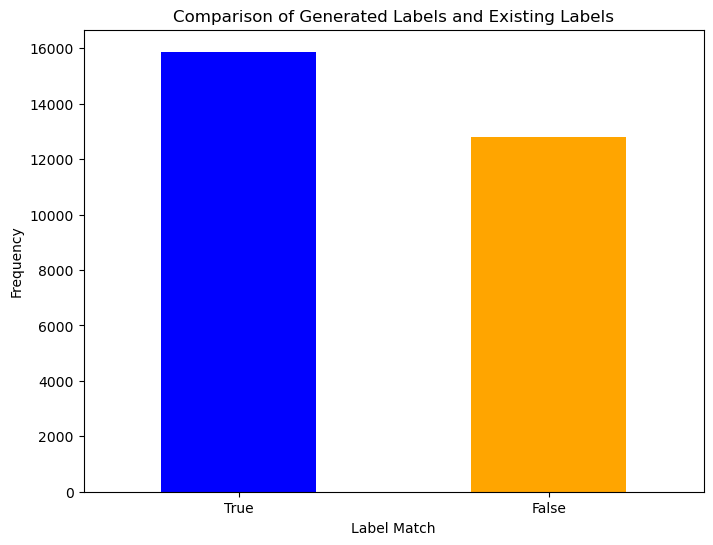

In [12]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
label_match_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparison of Generated Labels and Existing Labels')
plt.xlabel('Label Match')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['True', 'False'], rotation=0)
plt.show()

In [13]:
# Specify the file path for the output
output_file = 'sentiment_analysis_results-textblob2.csv'

In [14]:
# Save the results to the output file
dataset.to_csv(output_file, index=False)

print(f"Sentiment analysis results have been saved to '{output_file}'.")

Sentiment analysis results have been saved to 'sentiment_analysis_results-textblob2.csv'.
